<a href="https://colab.research.google.com/github/Kenneth-bit/Geekulcha-IEC-Challenge/blob/main/GKhack22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# reading in the entire dataset
dfname=pd.ExcelFile('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx')
df=pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx')
for items in dfname.sheet_names[1:]:
    dfnew=pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name=items)
    df=pd.concat([df,dfnew])

In [ ]:
# reading candidates from each province
EC = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='EC')
GT = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='GT')
KZ = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='KZ')
NC = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='NC')
NW = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='NW')
LP = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='LM')
WC = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='WC')
FS = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='FS')
MP = pd.read_excel('LGE 2016 - Candidate List Downloadable - 15 July 2016.xlsx',sheet_name='MP')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63654 entries, 0 to 7868
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Municipality               63654 non-null  object
 1   Party                      63654 non-null  object
 2   PR List OrderNo / Ward No  63654 non-null  int64 
 3   IDNumber                   63654 non-null  object
 4   Fullname                   63654 non-null  object
 5   Surname                    63654 non-null  object
 6   Gender                     63654 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.1+ MB


In [ ]:
def gender(df):
    '''
    This function generates a column gender from the IDNumber
    
    '''
    df['IDNumber'] = df['IDNumber'].astype(str)
    df['Gender'] = df['IDNumber'].apply(lambda x: x[6:7])
    df['Gender'] = df['Gender'].apply(lambda x: 'F' if int(x) < 5 else 'M' )
    return df['Gender']



In [ ]:
GT['Gender'] = gender(GT)
KZ['Gender'] = gender(KZ)
NC['Gender'] = gender(NC)
NW['Gender'] = gender(NW)
LP['Gender'] = gender(LP)
WC['Gender'] = gender(WC)
FS['Gender'] = gender(FS)
MP['Gender'] = gender(MP)
EC['Gender'] = gender(EC)
df['Gender'] = gender(df)

## **EDA**

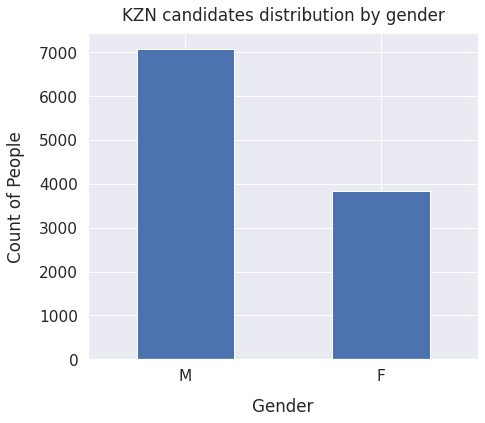

In [ ]:
sns.set(font_scale=1.4)
KZ['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("KZN candidates distribution by gender", y=1.02);

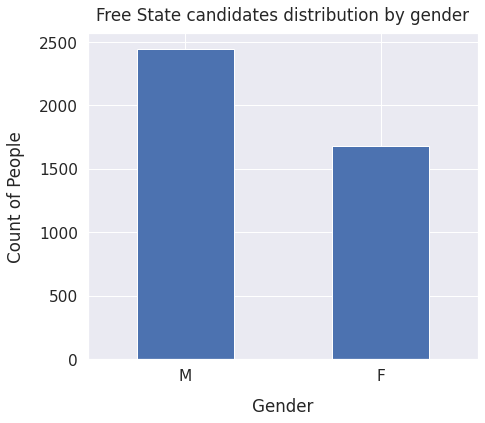

In [ ]:
sns.set(font_scale=1.4)
FS['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Free State candidates distribution by gender", y=1.02);

## **GENERAL**

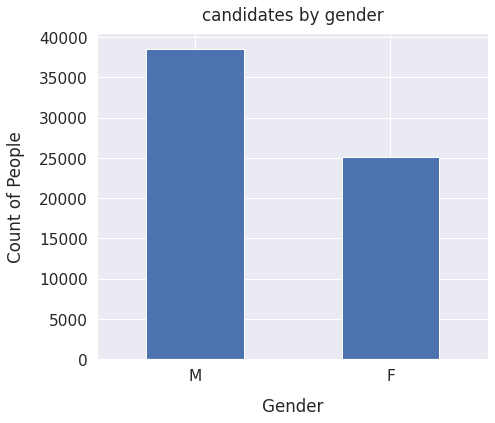

In [ ]:
sns.set(font_scale=1.4)
df['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("candidates by gender", y=1.02);

In [ ]:
GT[GT['IDNumber']=='7604025448087'].shape

(18, 7)

,Municipality,Party,PR List OrderNo / Ward No,IDNumber,Fullname,Surname,Gender
0,DC42 - Sedibeng,AFRICAN CHRISTIAN DEMOCRATIC PARTY,1,7604025448087,LEBELO ALFRED,MOTSEPE,M
1,DC42 - Sedibeng,AFRICAN CHRISTIAN DEMOCRATIC PARTY,2,3804280259088,NDINDI EMMAH,MASEKO,F
2,DC42 - Sedibeng,AFRICAN CHRISTIAN DEMOCRATIC PARTY,3,7604195278082,PHETHANE PASCA,MOTAUNG,M
3,DC42 - Sedibeng,AFRICAN NATIONAL CONGRESS,1,6610300339082,BUSISIWE JOYCE,MODISAKENG,F
4,DC42 - Sedibeng,AFRICAN NATIONAL CONGRESS,2,6306050423081,MATSHIDISO MELINA,GOMBA,F


In [ ]:
GT[GT['IDNumber']=='7604025448087'].shape

(18, 7)


We see that candidates are replicated in the datasets because they represent multiple wards as such to be able to report on the gender distribution we need to remove the duplicates

In [ ]:
GT_eda = GT[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
KZ_eda = KZ[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
NC_eda = NC[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
NW_eda = NW[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
LP_eda = LP[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
WC_eda = WC[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
FS_eda = FS[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
MP_eda = MP[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
EC_eda = EC[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()
df_eda = df[['IDNumber','Fullname', 'Surname', 'Gender']].drop_duplicates()

In [ ]:
GT_eda[GT_eda['IDNumber']=='7604025448087'].shape

(1, 4)

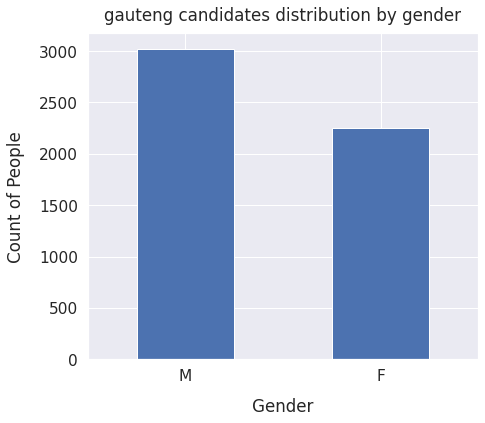

In [ ]:
sns.set(font_scale=1.4)
GT_eda['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Gauteng candidates distribution by gender", y=1.02);

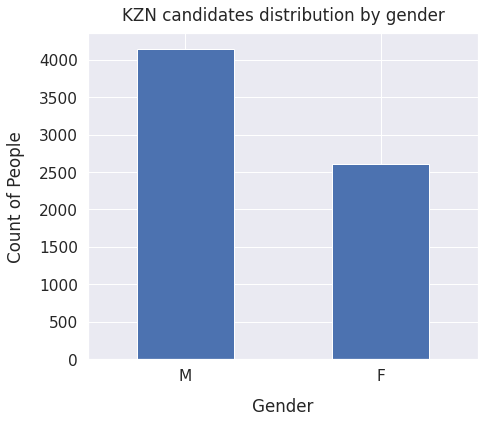

In [ ]:
sns.set(font_scale=1.4)
KZ_eda['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("KZN candidates distribution by gender", y=1.02);

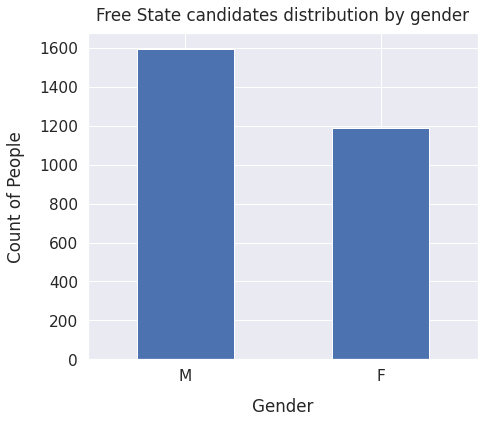

In [ ]:
sns.set(font_scale=1.4)
FS_eda['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Free State candidates distribution by gender", y=1.02);

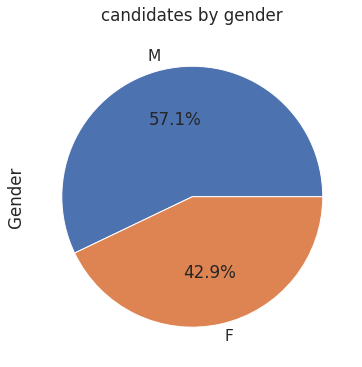

In [ ]:
sns.set(font_scale=1.4)
df_eda['Gender'].value_counts().plot(kind='pie', figsize=(7, 6), rot=0, autopct="%.1f%%")
#plt.xlabel("Gender", labelpad=14)
#plt.ylabel("Count of People", labelpad=14)
plt.title("candidates by gender", y=1.02);